In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np

# Load and check the

In [2]:
movie = pd.read_csv("IMDB-Movie-Data.csv")
movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [3]:
movie.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [4]:
movie.shape

(1000, 12)

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# 1. Check Missing value

In [6]:
print('Any missing value==> ',movie.isnull().values.any())

Any missing value==>  True


In [7]:
movie.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<Axes: >

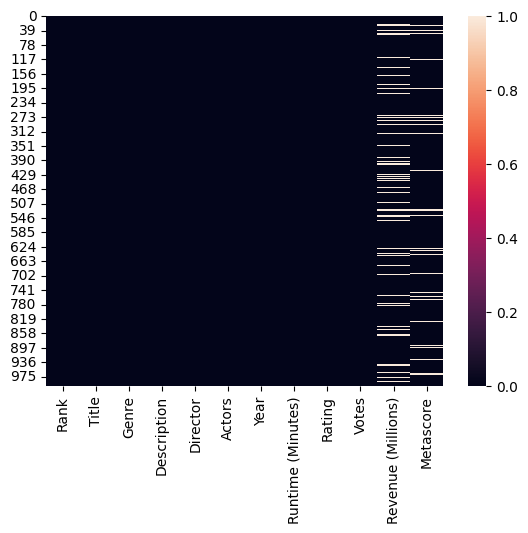

In [8]:
sns.heatmap(movie.isnull())

In [9]:
per_missing = movie.isnull().sum() * 100/ len(movie)
per_missing

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

# 2. Drop missing values

In [10]:
movie.dropna(axis=0)
movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


# 3. Check for duplicate data

In [11]:
print('Are there any duplicate values?',movie.duplicated().any())

Are there any duplicate values? False


In [12]:
movie.drop_duplicates()
movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


# 4. Plot boxplot for each dataset

Text(0.5, 1.0, 'Metascore')

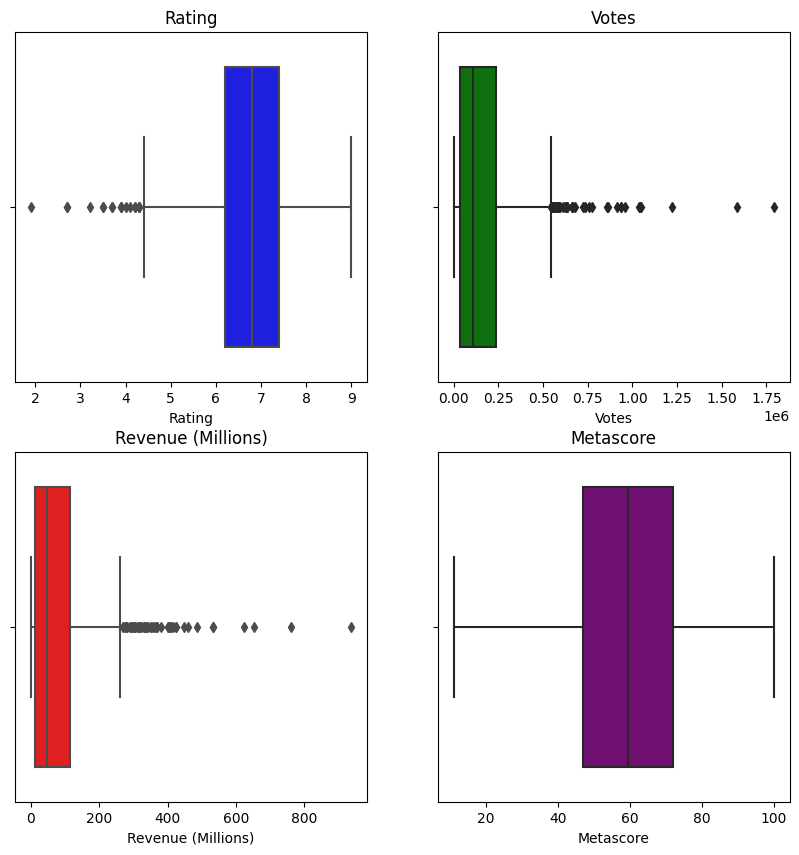

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
sns.boxplot(data=movie, x='Rating', color='blue', ax=axes[0])
axes[0].set_title('Rating')
sns.boxplot(data=movie, x='Votes', color='green', ax=axes[1])
axes[1].set_title('Votes')
sns.boxplot(data=movie, x='Revenue (Millions)', color='red', ax=axes[2])
axes[2].set_title('Revenue (Millions)')
sns.boxplot(data=movie, x='Metascore', color='purple', ax=axes[3])
axes[3].set_title('Metascore')

# 5. Replace Outlier

In [14]:
for column in ['Rating', 'Votes']:
    q1 = movie[column].quantile(0.25)
    q2 = movie[column].quantile(0.75)
    IQR = q2-q1
    max_limit = q2 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR)
    movie[column] = pd.DataFrame(np.where(movie[column] > max_limit, max_limit,
     (np.where(movie[column] < min_limit, min_limit, movie[column]))), columns=[column])
        

Text(0.5, 1.0, 'Metascore')

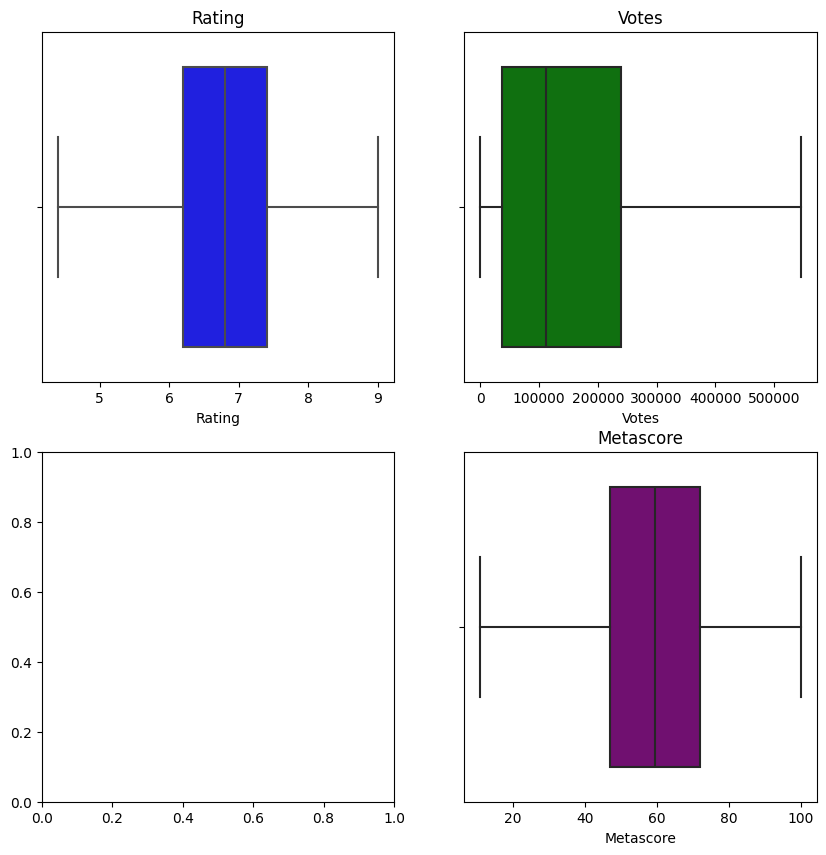

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
sns.boxplot(data=movie, x='Rating', color='blue', ax=axes[0])
axes[0].set_title('Rating')
sns.boxplot(data=movie, x='Votes', color='green', ax=axes[1])
axes[1].set_title('Votes')
sns.boxplot(data=movie, x='Metascore', color='purple', ax=axes[3])
axes[3].set_title('Metascore')

# 6. Get overall statistics about the data

In [16]:
movie.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.736500,160786.002375,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.902548,154263.835033,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,4.400000,61.000000,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,36309.000000,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,110799.000000,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,239909.750000,113.715000,72.000000


# 7. Which year there was the higest average voting?

In [17]:
movie.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    253879.580078
2006    249779.647727
2007    241776.599057
2008    239874.603365
2011    239358.577381
2009    235026.164216
2010    228823.522917
2013    213840.719780
2014    195643.301020
2015    114036.343504
2016     48314.023148
Name: Votes, dtype: float64

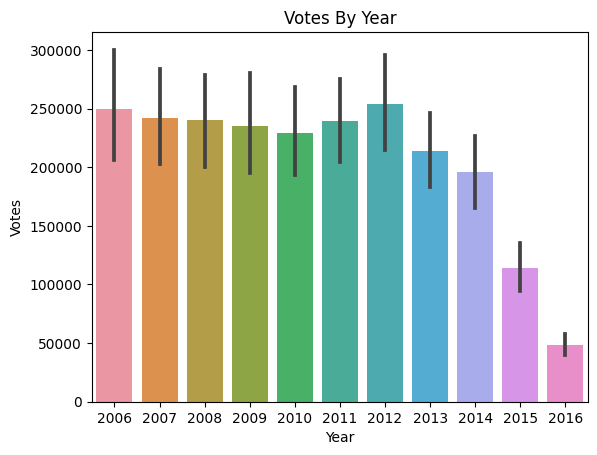

In [18]:
sns.barplot(x='Year',y='Votes',data=movie)
plt.title("Votes By Year")
plt.show()

# 8. Which year there was the highest average revenue?

In [19]:
movie.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2009    112.601277
2012    107.973281
2010    105.081579
2008     99.082745
2007     87.882245
2011     87.612258
2013     87.121818
2006     86.296667
2014     85.078723
2015     78.355044
2016     54.690976
Name: Revenue (Millions), dtype: float64

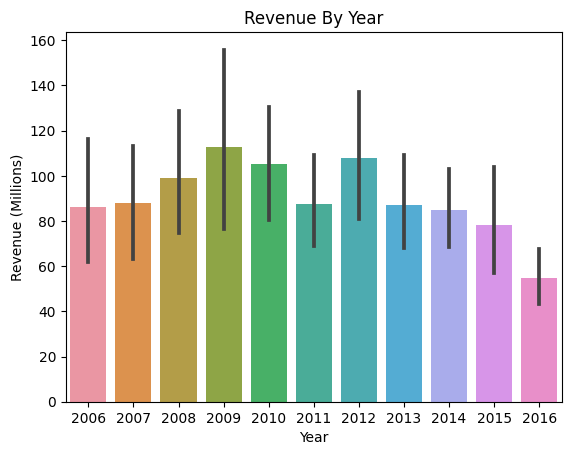

In [20]:
sns.barplot(x='Year',y='Revenue (Millions)',data=movie)
plt.title("Revenue By Year")
plt.show()

# 9. Find the average rating for each Title

In [21]:
movie.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [22]:
movie.groupby('Title')['Rating'].mean().sort_values(ascending=False)

Title
The Dark Knight             9.0
Dangal                      8.8
Inception                   8.8
Interstellar                8.6
The Intouchables            8.6
                           ... 
Dragonball Evolution        4.4
2307: Winter's Dream        4.4
The Black Room              4.4
Tall Men                    4.4
The Disappointments Room    4.4
Name: Rating, Length: 999, dtype: float64

# 10. Display top 10 movies title and rating

In [23]:
top10_rating = movie.nlargest(10,'Rating')[['Title','Rating']].set_index('Title')
top10_rating

,Rating
Title,
The Dark Knight,9.0
Inception,8.8
Dangal,8.8
Interstellar,8.6
Kimi no na wa,8.6
The Intouchables,8.6
The Prestige,8.5
The Departed,8.5
The Dark Knight Rises,8.5


<Axes: xlabel='Rating', ylabel='Title'>

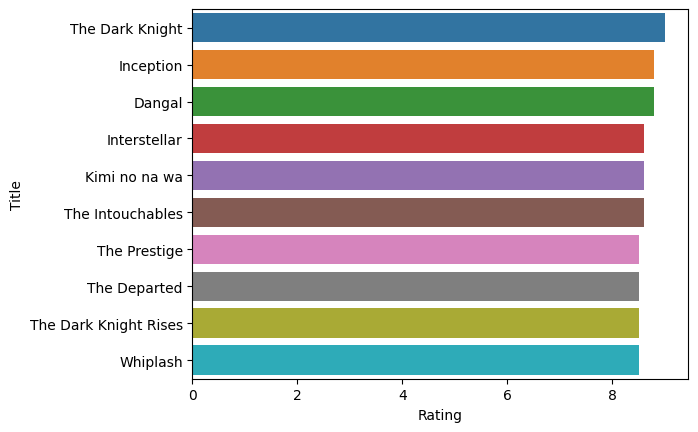

In [24]:
sns.barplot(x='Rating',y=top10_rating.index,data=top10_rating)

# 11. Count number of movies in year

In [25]:
movie['Year'].value_counts()

Year
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: count, dtype: int64

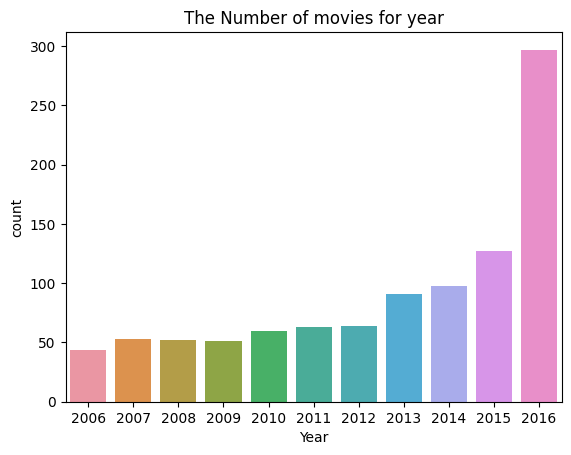

In [26]:
sns.countplot(x='Year',data=movie)
plt.title("The Number of movies for year")
plt.show()

# 12. Find most popular movie title(Higest Revenue)

In [27]:
movie[movie['Revenue (Millions)'].max()==movie['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

# 13. Display 10 higest rated movie titles and its directors

In [28]:
top10_title = movie.nlargest(10,'Rating')[['Title','Rating','Director','Votes']].set_index('Title')
top10_title

,Rating,Director,Votes
Title,,,
The Dark Knight,9.0,Christopher Nolan,545310.875
Inception,8.8,Christopher Nolan,545310.875
Dangal,8.8,Nitesh Tiwari,48969.000
Interstellar,8.6,Christopher Nolan,545310.875
Kimi no na wa,8.6,Makoto Shinkai,34110.000
The Intouchables,8.6,Olivier Nakache,545310.875
The Prestige,8.5,Christopher Nolan,545310.875
The Departed,8.5,Martin Scorsese,545310.875
The Dark Knight Rises,8.5,Christopher Nolan,545310.875


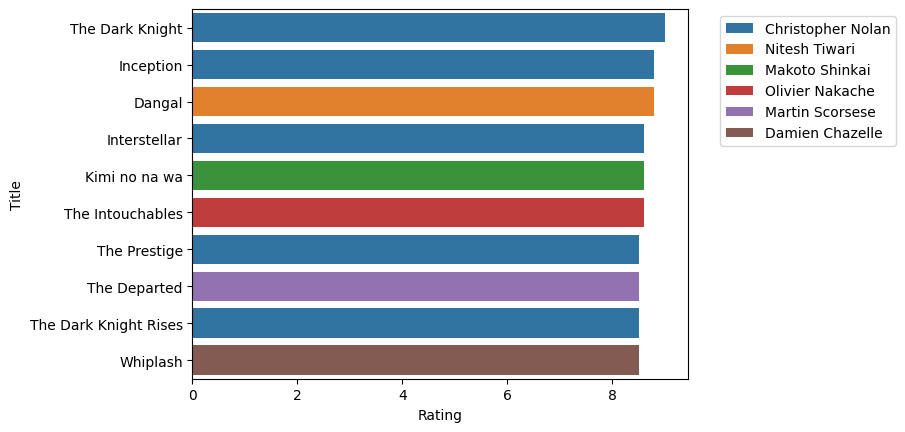

In [29]:
sns.barplot(x='Rating',y=top10_title.index,data=top10_title,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

# 14. Find the highest 10 revenue movies

In [30]:
top10_revenue=movie.nlargest(10,'Revenue (Millions)')[['Title','Revenue (Millions)','Director','Year']].set_index('Title')
top10_revenue

,Revenue (Millions),Director,Year
Title,,,
Star Wars: Episode VII - The Force Awakens,936.63,J.J. Abrams,2015
Avatar,760.51,James Cameron,2009
Jurassic World,652.18,Colin Trevorrow,2015
The Avengers,623.28,Joss Whedon,2012
The Dark Knight,533.32,Christopher Nolan,2008
Rogue One,532.17,Gareth Edwards,2016
Finding Dory,486.29,Andrew Stanton,2016
Avengers: Age of Ultron,458.99,Joss Whedon,2015
The Dark Knight Rises,448.13,Christopher Nolan,2012


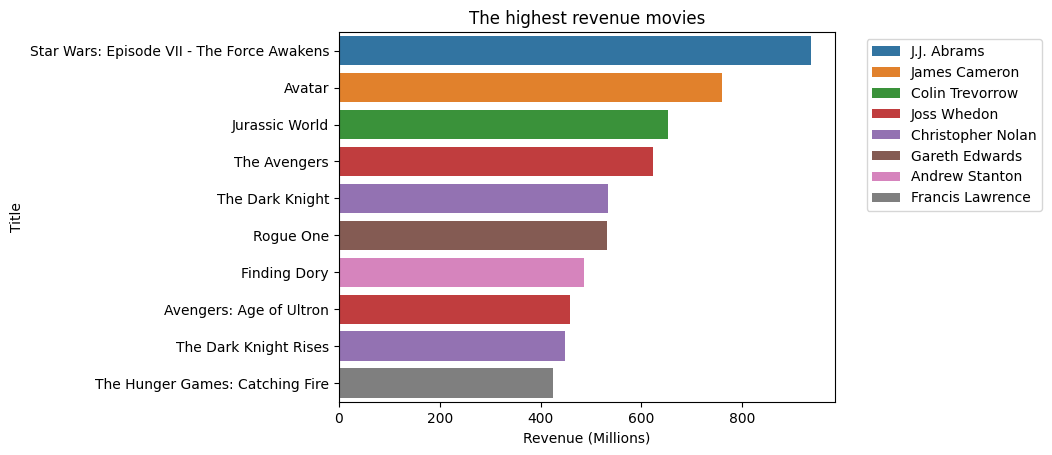

In [31]:
sns.barplot(x='Revenue (Millions)',y=top10_revenue.index,data=top10_revenue,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title("The highest revenue movies")
plt.show()

# 15. Classification rating movies(Excellent,Good,Average)

In [32]:
def rating(rating):
    if rating>=7.0:
        return "Excellent"
    elif rating>=6.0:
        return "Good"
    else:
        return "Average"

In [33]:
movie['rating_cat'] = movie['Rating'].apply(rating)

In [34]:
movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cat
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,545310.875,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820.000,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606.000,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545.000,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727.000,325.02,40.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585.000,NaN,45.0,Good
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152.000,17.54,46.0,Average
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699.000,58.01,50.0,Good
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881.000,NaN,22.0,Average


# 16. Univariate Analysis

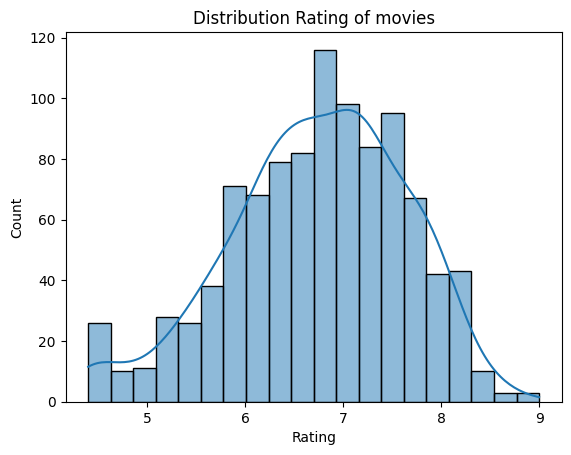

In [35]:
sns.histplot(data=movie['Rating'],kde=True)
plt.title("Distribution Rating of movies")
plt.show()

In [36]:
skew(movie["Rating"])

-0.3999699348962524

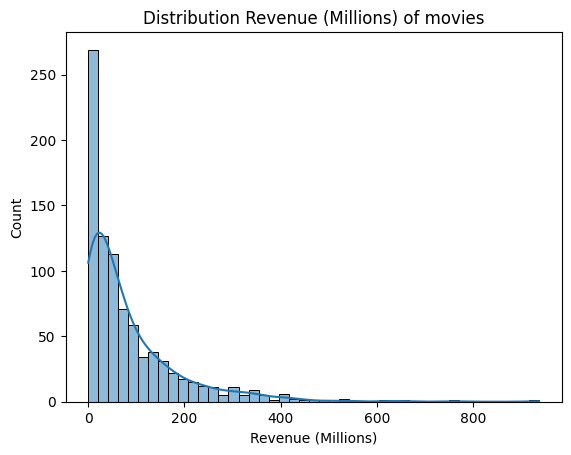

In [37]:
sns.histplot(data=movie['Revenue (Millions)'],kde=True)
plt.title("Distribution Revenue (Millions) of movies")
plt.show()

In [38]:
skew(movie["Revenue (Millions)"])

nan

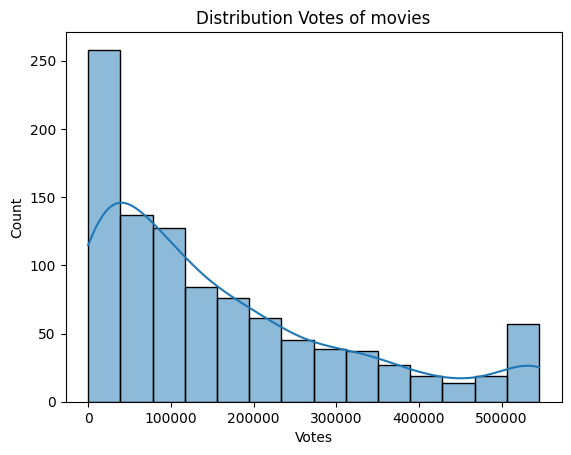

In [39]:
sns.histplot(data=movie['Votes'],kde=True)
plt.title("Distribution Votes of movies")
plt.show()

In [40]:
skew(movie["Votes"])

1.0793798330210842

# 17. Find correlation of dataset

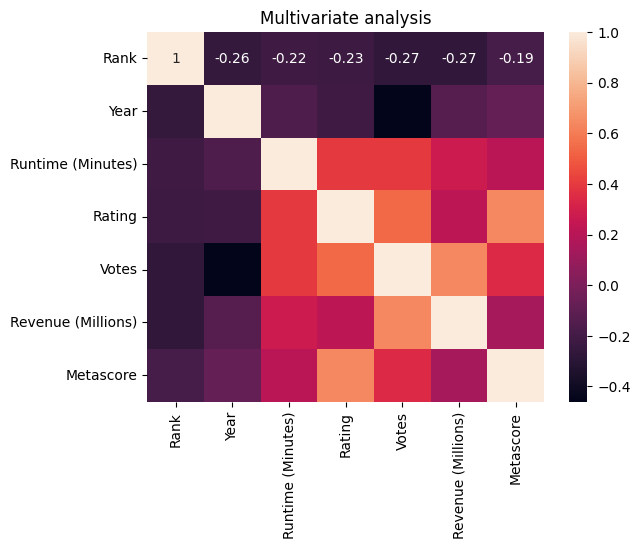

In [41]:
sns.heatmap(np.round(movie.corr(numeric_only=True),2),annot=True)
plt.title("Multivariate analysis")
plt.show()

# 18 Apply Machine learning to recommend the titles of movie to customers

In [42]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
movie.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'rating_cat'],
      dtype='object')

In [44]:
# select the features for recommendation movie
select_feature = ['Genre','Description','Director','Actors']  
print(select_feature)

['Genre', 'Description', 'Director', 'Actors']


In [45]:
# replacing the null valuess with null string
for feature in select_feature:
  movie[feature] = movie[feature].fillna('')

In [46]:
# combining all the 5 selected features
combine_feature = movie['Genre'] +' ' +movie['Description'] +' ' +movie['Director'] +' ' +movie['Actors']
print(combine_feature)

0      Action,Adventure,Sci-Fi A group of intergalact...
1      Adventure,Mystery,Sci-Fi Following clues to th...
2      Horror,Thriller Three girls are kidnapped by a...
3      Animation,Comedy,Family In a city of humanoid ...
4      Action,Adventure,Fantasy A secret government a...
                             ...                        
995    Crime,Drama,Mystery A tight-knit team of risin...
996    Horror Three American college students studyin...
997    Drama,Music,Romance Romantic sparks occur betw...
998    Adventure,Comedy A pair of friends embark on a...
999    Comedy,Family,Fantasy A stuffy businessman fin...
Length: 1000, dtype: object


In [47]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combine_feature)
print(feature_vectors)

  (0, 6866)	0.2208390477858074
  (0, 8820)	0.21589359852035722
  (0, 1791)	0.18385767904288147
  (0, 1087)	0.19791240156183035
  (0, 2242)	0.21589359852035722
  (0, 8417)	0.21589359852035722
  (0, 6192)	0.21589359852035722
  (0, 1513)	0.1458643387421238
  (0, 3497)	0.24156489683885848
  (0, 4178)	0.13015531275725872
  (0, 8265)	0.2208390477858074
  (0, 7885)	0.04918789804567106
  (0, 1775)	0.20762928635939698
  (0, 7744)	0.20762928635939698
  (0, 3151)	0.10758206477554348
  (0, 8516)	0.20409939238136726
  (0, 2853)	0.26723619515735975
  (0, 7537)	0.17520555334070667
  (0, 8000)	0.1645510018833547
  (0, 8733)	0.18015100260615685
  (0, 7992)	0.10836950062008444
  (0, 3055)	0.1708433579369093
  (0, 495)	0.12880840596915433
  (0, 1897)	0.23330058467789824
  (0, 4057)	0.23330058467789824
  :	:
  (998, 206)	0.08815189273478231
  (999, 3727)	0.2702249772069396
  (999, 1483)	0.2702249772069396
  (999, 7593)	0.2702249772069396
  (999, 354)	0.2550402823496917
  (999, 7386)	0.23590982927978008
  

# Cosine Similarity

In [48]:
# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)
print(similarity)
print(similarity.shape)

[[1.         0.06046774 0.04060199 ... 0.02133447 0.02899224 0.00933189]
 [0.06046774 1.         0.04458906 ... 0.0069634  0.02655796 0.02538796]
 [0.04060199 0.04458906 1.         ... 0.00632286 0.01673092 0.00491672]
 ...
 [0.02133447 0.0069634  0.00632286 ... 1.         0.03305475 0.00765816]
 [0.02899224 0.02655796 0.01673092 ... 0.03305475 1.         0.01330482]
 [0.00933189 0.02538796 0.00491672 ... 0.00765816 0.01330482 1.        ]]
(1000, 1000)


# Getting movie title form user

In [49]:
movie_title = input("Please Input a title of movie: ")

Please Input a title of movie:  Superman


In [50]:
# creating a list with all the movie names given in the dataset
#movie['Title'] = movie['Title'].astype(int)
list_of_all_titles = movie['Title'].tolist()
print(list_of_all_titles)

['Guardians of the Galaxy', 'Prometheus', 'Split', 'Sing', 'Suicide Squad', 'The Great Wall', 'La La Land', 'Mindhorn', 'The Lost City of Z', 'Passengers', 'Fantastic Beasts and Where to Find Them', 'Hidden Figures', 'Rogue One', 'Moana', 'Colossal', 'The Secret Life of Pets', 'Hacksaw Ridge', 'Jason Bourne', 'Lion', 'Arrival', 'Gold', 'Manchester by the Sea', 'Hounds of Love', 'Trolls', 'Independence Day: Resurgence', 'Paris pieds nus', 'Bahubali: The Beginning', 'Dead Awake', 'Bad Moms', "Assassin's Creed", 'Why Him?', 'Nocturnal Animals', 'X-Men: Apocalypse', 'Deadpool', 'Resident Evil: The Final Chapter', 'Captain America: Civil War', 'Interstellar', 'Doctor Strange', 'The Magnificent Seven', '5/25/1977', 'Sausage Party', 'Moonlight', "Don't Fuck in the Woods", 'The Founder', 'Lowriders', 'Pirates of the Caribbean: On Stranger Tides', 'Miss Sloane', 'Fallen', 'Star Trek Beyond', 'The Last Face', 'Star Wars: Episode VII - The Force Awakens', 'Underworld: Blood Wars', "Mother's Day",

In [51]:
# finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_title, list_of_all_titles)
print(find_close_match)
close_match = find_close_match[0]
print(close_match)

['Super', 'Superbad', 'Superman Returns']
Super


In [52]:
# finding the index of the movie with title
index_of_the_movie = movie[movie.Title == close_match]['Rank'].values[0]
print(index_of_the_movie)

938


In [53]:
# getting a list of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.010093927311696959), (1, 0.016320380502935102), (2, 0.01650861528618175), (3, 0.011246843950633386), (4, 0.016315894304142913), (5, 0.07361150961870715), (6, 0.007759155545601314), (7, 0.021061222614040413), (8, 0.022892068929524275), (9, 0.04638548251538995), (10, 0.012717961965963066), (11, 0.06384000392233051), (12, 0.01992035000947584), (13, 0.01229878025332043), (14, 0.02797205528159247), (15, 0.007160688658429466), (16, 0.033666832936989535), (17, 0.0181347359171835), (18, 0.031689057651487454), (19, 0.0313388238406142), (20, 0.045007739393046434), (21, 0.007653161881631385), (22, 0.016423703823706715), (23, 0.03285485290013431), (24, 0.014315657537208547), (25, 0.002811926341392989), (26, 0.01813926085054078), (27, 0.013255790034186792), (28, 0.004726988585825302), (29, 0.032857949074498315), (30, 0.03161191071936978), (31, 0.03144405956974262), (32, 0.029981933975218436), (33, 0.019138516440762046), (34, 0.04042309571008662), (35, 0.015995563195279065), (36, 0.0111914635

In [54]:
# sorting the movies based on their similarity score
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(938, 1.0000000000000007), (686, 0.11666349848389358), (759, 0.1157032791798217), (391, 0.10089864706674478), (336, 0.0983392361291422), (277, 0.09449506787245025), (231, 0.0936843859969242), (510, 0.09110469631277418), (104, 0.08966880963855003), (864, 0.08771510451689751), (99, 0.08730670141084465), (820, 0.08281782778145093), (520, 0.08229308260457008), (280, 0.08144792255575735), (46, 0.08023216760901845), (63, 0.07840558141739978), (342, 0.07699084302294198), (406, 0.07485985433469731), (689, 0.0746938204621055), (86, 0.0746812124012267), (597, 0.07435045142223538), (281, 0.0737084472429734), (5, 0.07361150961870715), (560, 0.07292572730478232), (737, 0.07251603199409916), (621, 0.07232151646805737), (552, 0.07225869494736763), (61, 0.07065032896492338), (100, 0.0699089435213604), (11, 0.06384000392233051), (92, 0.06322485666519967), (511, 0.06200661495746414), (655, 0.06189331528236893), (84, 0.061267058964289106), (673, 0.06118059227350616), (68, 0.06091787314942138), (840, 0.0

# print the name of similar movies based on the index


In [55]:
print('Movies suggested for you:\n')
i = 1
for movies in sorted_similar_movies:
    index = movies[0]
    title_from_index = movie.loc[index, 'Title']  
    print(f"{i}. {title_from_index}")
    i += 1
    if i >= 10:
        break 


Movies suggested for you:

1. The Siege of Jadotville
2. Hunger
3. The Fighter
4. The Gunman
5. Silver Linings Playbook
6. Zodiac
7. A Kind of Murder
8. The Boy in the Striped Pyjamas
9. The Man from U.N.C.L.E.


# Movie recommendation system 

In [ ]:
movie_title = input("Please Input a title of movie: ")
list_of_all_titles = movie['Title'].tolist()
find_close_match = difflib.get_close_matches(movie_title, list_of_all_titles)
close_match = find_close_match[0]
index_of_the_movie = movie[movie.Title == close_match]['Rank'].values[0]
similarity_score = list(enumerate(similarity[index_of_the_movie]))
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you:\n')

i = 1
for movies in sorted_similar_movies:
    index = movies[0]
    title_from_index = movie.loc[index, 'Title']
    
    print(f"{i}. {title_from_index}")

    i += 1
    if i > 10:
        break 